# Hands-On Pertemuan 12 and 13: Data Cleaning, Preparation, and Visualization

## Objectives:
- **Pertemuan 12**: Master data cleaning and preparation techniques using Pandas.
- **Pertemuan 13**: Develop skills in data visualization using Matplotlib and Seaborn for effective data analysis.


## Pertemuan 12: Data Cleaning and Preparation using Pandas

### Topics Covered
- Identifying and handling missing data.
- Data transformation and normalization.
- Data filtering and deduplication.
- Standardization of categorical data.
- Outlier detection and handling.


In [1]:
# Exercise 1: Identifying and Handling Missing Data
import pandas as pd

# Sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [24, 30, None, 22, 35],
    'Salary': [48000, None, 57000, None, 60000]
}
df = pd.DataFrame(data)

# Filling missing values and dropping rows
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.dropna(subset=['Name'], inplace=True)
print('After cleaning:\n', df)


After cleaning:
       Name    Age   Salary
0    Alice  24.00  48000.0
1      Bob  30.00  57000.0
2  Charlie  27.75  57000.0
3    David  22.00  57000.0


<ipython-input-1-7d141c975721>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-1-7d141c975721>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [2]:
# Exercise 2: Standardizing Categorical Data
# Sample dataset with inconsistent categorical values
data = {
    'Product': ['Laptop', 'Laptop', 'Desktop', 'Tablet', 'Tablet'],
    'Category': ['Electronics', 'electronics', 'Electronics', 'Gadgets', 'gadgets']
}
df = pd.DataFrame(data)

# Standardize category values
df['Category'] = df['Category'].str.capitalize()
print('Standardized Data:\n', df)


Standardized Data:
    Product     Category
0   Laptop  Electronics
1   Laptop  Electronics
2  Desktop  Electronics
3   Tablet      Gadgets
4   Tablet      Gadgets


### Practice Tasks
- Load a dataset of your choice and identify missing values.
- Implement data transformations to normalize numerical columns.
- Standardize categorical columns and remove duplicates.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")

print("Path to dataset files:", path)


100%|██████████| 1.95M/1.95M [00:00<00:00, 107MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/karkavelrajaj/amazon-sales-dataset/versions/1


In [5]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")

dataset_path = path + "/amazon.csv"

# Load the dataset using the correct path
df = pd.read_csv(dataset_path)

# Display the first few rows
print(df.head(10))

# Identify missing values
print()
print("Missing Values:")
print(df.isnull().sum())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
5  B08Y1TFSP6  pTron Solero TB301 3A Type-C Data and Fast Cha...   
6  B08WRWPM22  boAt Micro USB 55 Tangle-free, Sturdy Micro US...   
7  B08DDRGWTJ             MI Usb Type-C Cable Smartphone (Black)   
8  B008IFXQFU  TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...   
9  B082LZGK39  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accesso

In [6]:
# Data cleaning

# 1. Menghapus baris dengan nilai kosong di kolom `rating_count`.
df_cleaned = df.dropna(subset=['rating_count'])

# 2. Menghapus simbol non-numerik dari kolom harga, diskon, dan konversi ke tipe data numerik.
def clean_numeric(column):
    return df_cleaned[column].str.replace(r'[^\d.]', '', regex=True).astype(float)

df_cleaned['discounted_price'] = clean_numeric('discounted_price')
df_cleaned['actual_price'] = clean_numeric('actual_price')
df_cleaned['discount_percentage'] = clean_numeric('discount_percentage')


# 3. Menghapus simbol koma dari `rating_count` dan konversi ke tipe integer.
df_cleaned['rating_count'] = df_cleaned['rating_count'].str.replace(',', '').astype(int)

# 4. Menambahkan kolom baru `discount_value` untuk menghitung nilai diskon.
df_cleaned['discount_value'] = df_cleaned['actual_price'] - df_cleaned['discounted_price']

# 5. Menormalisasi kolom teks untuk konsistensi (e.g., `category`).
df_cleaned['category'] = df_cleaned['category'].str.split('|').str[0]

# Menghapus duplikasi
df.drop_duplicates(inplace=True)

# Output hasil cleaning.
df_cleaned.head(), df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category             1463 non-null   object 
 3   discounted_price     1463 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1463 non-null   float64
 6   rating               1463 non-null   object 
 7   rating_count         1463 non-null   int64  
 8   about_product        1463 non-null   object 
 9   user_id              1463 non-null   object 
 10  user_name            1463 non-null   object 
 11  review_id            1463 non-null   object 
 12  review_title         1463 non-null   object 
 13  review_content       1463 non-null   object 
 14  img_link             1463 non-null   object 
 15  product_link         1463 non-null   object

<ipython-input-6-22a2a6c263d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['discounted_price'] = clean_numeric('discounted_price')
<ipython-input-6-22a2a6c263d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['actual_price'] = clean_numeric('actual_price')
<ipython-input-6-22a2a6c263d7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

(   product_id                                       product_name  \
 0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
 1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
 2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
 3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
 4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
 
                 category  discounted_price  actual_price  discount_percentage  \
 0  Computers&Accessories             399.0        1099.0                 64.0   
 1  Computers&Accessories             199.0         349.0                 43.0   
 2  Computers&Accessories             199.0        1899.0                 90.0   
 3  Computers&Accessories             329.0         699.0                 53.0   
 4  Computers&Accessories             154.0         399.0                 61.0   
 
   rating  rating_count                                      about_product  \
 0    4.2   

## Pertemuan 13: Data Visualization using Matplotlib and Seaborn

### Topics Covered
- Plotting data distributions and comparisons.
- Creating time series visualizations.
- Visualizing relationships between variables.
- Customizing plot styles and layouts.


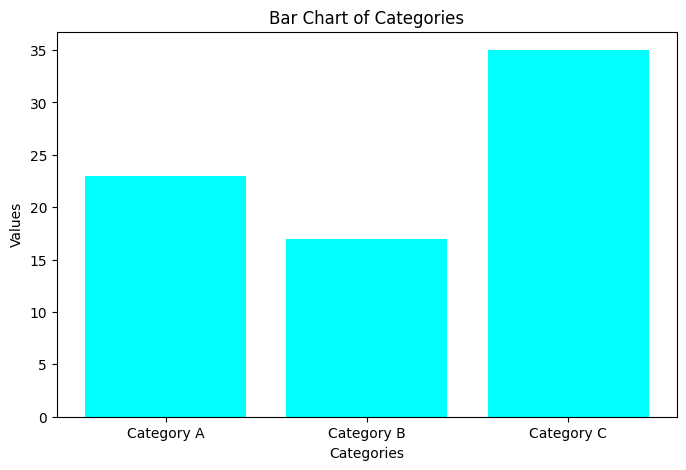

In [7]:
# Exercise 1: Basic Plotting with Matplotlib
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()


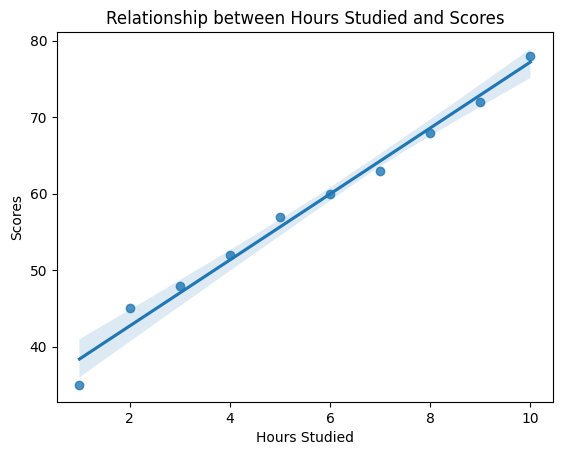

In [8]:
# Exercise 2: Seaborn for Relationship Visualization
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)

# Plot
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()


### Practice Tasks
- Use Matplotlib to create a multi-bar chart to compare data across groups.
- Generate scatter plots with Seaborn to explore relationships between variables in a dataset.
- Customize plot layouts and color schemes.


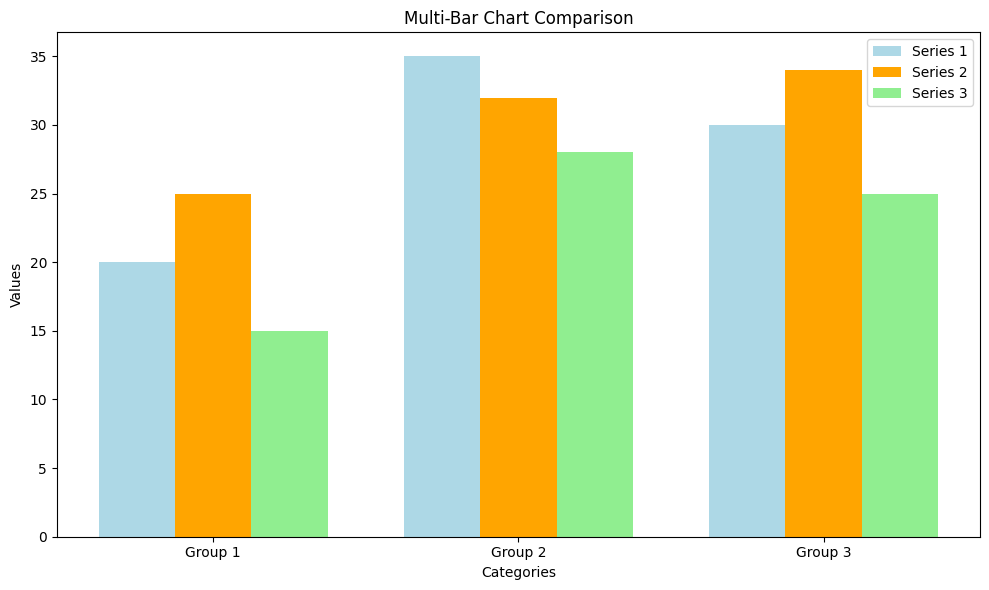

In [9]:
# Exercise 1: Multi-Bar Chart using Matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
categories = ['Group 1', 'Group 2', 'Group 3']
values1 = [20, 35, 30]  # Data untuk Seri 1
values2 = [25, 32, 34]  # Data untuk Seri 2
values3 = [15, 28, 25]  # Data untuk Seri 3

x = np.arange(len(categories))  # Lokasi label
width = 0.25  # Lebar bar

# Plot multi-bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width, values1, width, label='Series 1', color='lightblue')
plt.bar(x, values2, width, label='Series 2', color='orange')
plt.bar(x + width, values3, width, label='Series 3', color='lightgreen')

# Labeling
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Multi-Bar Chart Comparison')
plt.xticks(x, categories)
plt.legend()
plt.tight_layout()
plt.show()


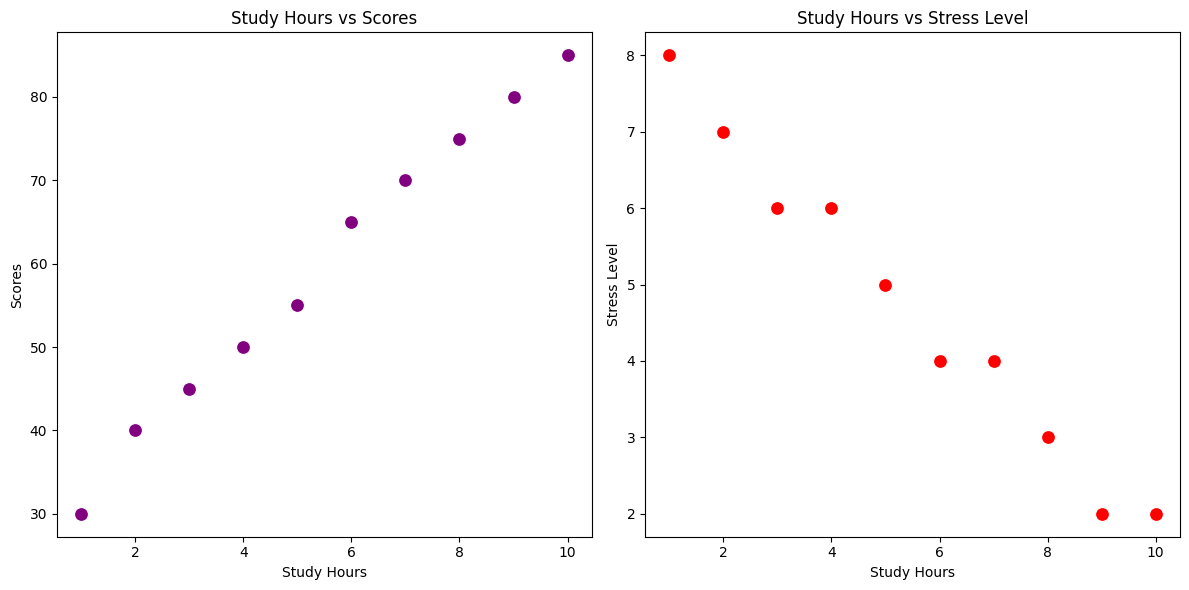

In [10]:
# Exercise 2: Scatter Plot with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Study Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [30, 40, 45, 50, 55, 65, 70, 75, 80, 85],
    'Stress Level': [8, 7, 6, 6, 5, 4, 4, 3, 2, 2]
}
df = pd.DataFrame(data)

# Plot scatter plots to explore relationships
plt.figure(figsize=(12, 6))

# Scatter plot: Study Hours vs Scores
plt.subplot(1, 2, 1)
sns.scatterplot(x='Study Hours', y='Scores', data=df, color='purple', s=100)
plt.title('Study Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')

# Scatter plot: Study Hours vs Stress Level
plt.subplot(1, 2, 2)
sns.scatterplot(x='Study Hours', y='Stress Level', data=df, color='red', s=100)
plt.title('Study Hours vs Stress Level')
plt.xlabel('Study Hours')
plt.ylabel('Stress Level')

plt.tight_layout()
plt.show()


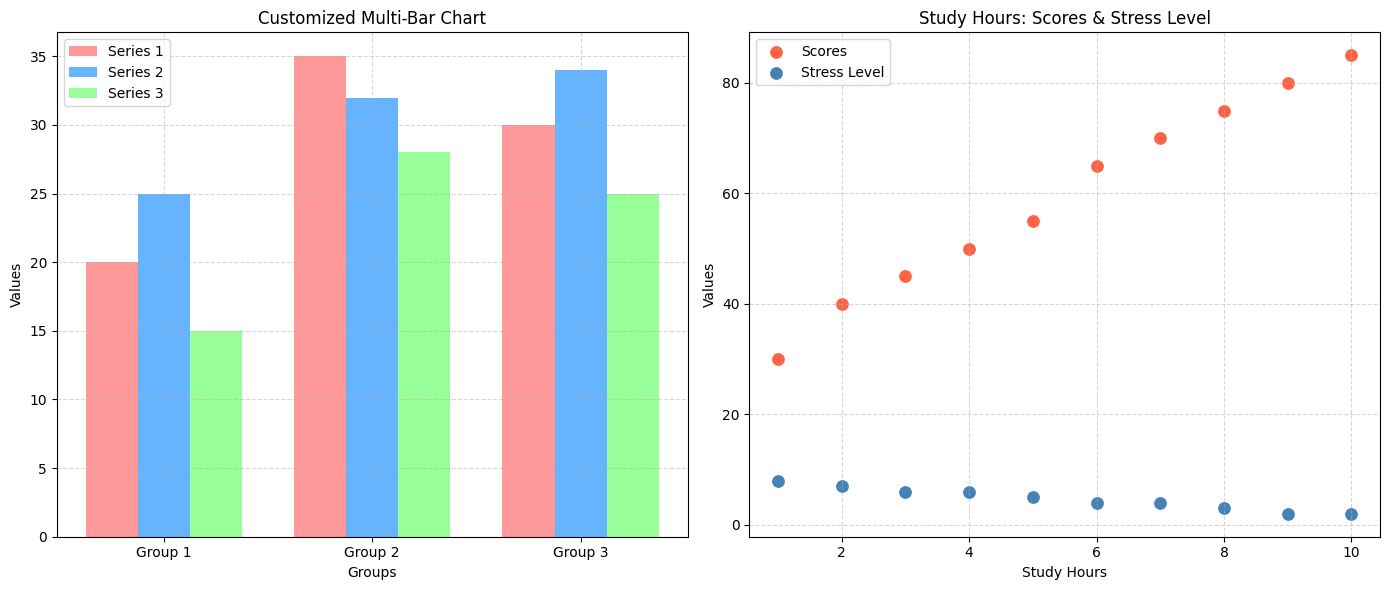

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data untuk Multi-Bar Chart
categories = ['Group 1', 'Group 2', 'Group 3']
values1 = [20, 35, 30]
values2 = [25, 32, 34]
values3 = [15, 28, 25]
x = np.arange(len(categories))
width = 0.25

# Data untuk Scatter Plot
data = {
    'Study Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [30, 40, 45, 50, 55, 65, 70, 75, 80, 85],
    'Stress Level': [8, 7, 6, 6, 5, 4, 4, 3, 2, 2]
}
df = pd.DataFrame(data)

# Plot Multi-Bar Chart dan Scatter Plot dalam satu layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Multi-Bar Chart
axes[0].bar(x - width, values1, width, label='Series 1', color='#FF9999')  # Warna custom (soft red)
axes[0].bar(x, values2, width, label='Series 2', color='#66B3FF')  # Warna custom (soft blue)
axes[0].bar(x + width, values3, width, label='Series 3', color='#99FF99')  # Warna custom (soft green)
axes[0].set_xticks(x)
axes[0].set_xticklabels(categories)
axes[0].set_title('Customized Multi-Bar Chart')
axes[0].set_xlabel('Groups')
axes[0].set_ylabel('Values')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)  # Menambahkan grid tipis

# Scatter Plot
sns.scatterplot(x='Study Hours', y='Scores', data=df, ax=axes[1], color='#FF6347', s=100, label='Scores')  # Tomato color
sns.scatterplot(x='Study Hours', y='Stress Level', data=df, ax=axes[1], color='#4682B4', s=100, label='Stress Level')  # Steel blue color
axes[1].set_title('Study Hours: Scores & Stress Level')
axes[1].set_xlabel('Study Hours')
axes[1].set_ylabel('Values')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)  # Menambahkan grid tipis

# Layout adjustment
plt.tight_layout()
plt.show()


## Homework for Students
- **Pertemuan 12**: Clean a real-world dataset (from Kaggle or another source), perform normalization, handle outliers, and prepare the data for analysis.
- **Pertemuan 13**: Create a dashboard with multiple visualizations to summarize a dataset of your choice.


Data Awal:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Data Setelah Cleaning:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    53636

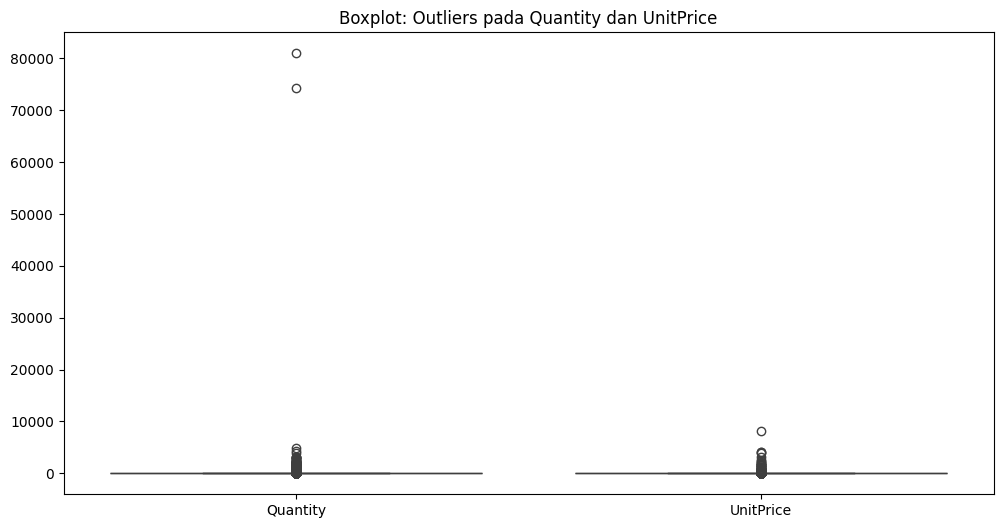


Data Setelah Menghapus Outliers:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Data Setelah Normalisasi:
   Quantity  UnitPrice
0  0.192308   0.339912
1  0.192308   0.451927
2  0.269231   0.366582
3  0.192308   0.451927
4  0.192308  

<ipython-input-13-6b73a9ade9af>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[['Quantity', 'UnitPrice']] = scaler.fit_transform(df_no_outliers[['Quantity', 'UnitPrice']])


In [13]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'Online Retail.xlsx'  # Ganti path jika diperlukan
df = pd.read_excel(file_path)

# 1. Lihat data awal
print("Data Awal:")
print(df.head())

# 2. Cleaning Data
# a. Hapus baris dengan nilai NULL di kolom 'Description' dan 'CustomerID'
df_cleaned = df.dropna(subset=['Description', 'CustomerID'])

# b. Hapus data duplikat
df_cleaned = df_cleaned.drop_duplicates()

# c. Konversi kolom 'InvoiceDate' ke format datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# d. Hapus data Quantity dan UnitPrice negatif
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

print("\nData Setelah Cleaning:")
print(df_cleaned.head())

# 3. Handling Outliers
# Visualisasi outliers menggunakan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['Quantity', 'UnitPrice']])
plt.title("Boxplot: Outliers pada Quantity dan UnitPrice")
plt.show()

# Mengatasi outliers menggunakan IQR
Q1 = df_cleaned[['Quantity', 'UnitPrice']].quantile(0.25)
Q3 = df_cleaned[['Quantity', 'UnitPrice']].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_cleaned[~((df_cleaned[['Quantity', 'UnitPrice']] < (Q1 - 1.5 * IQR)) |
                             (df_cleaned[['Quantity', 'UnitPrice']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nData Setelah Menghapus Outliers:")
print(df_no_outliers.head())

# 4. Normalisasi Data (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_no_outliers[['Quantity', 'UnitPrice']] = scaler.fit_transform(df_no_outliers[['Quantity', 'UnitPrice']])

print("\nData Setelah Normalisasi:")
print(df_no_outliers[['Quantity', 'UnitPrice']].head())


<ipython-input-14-1d7b0fd4ee92>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['TotalSales'] = df_no_outliers['Quantity'] * df_no_outliers['UnitPrice']


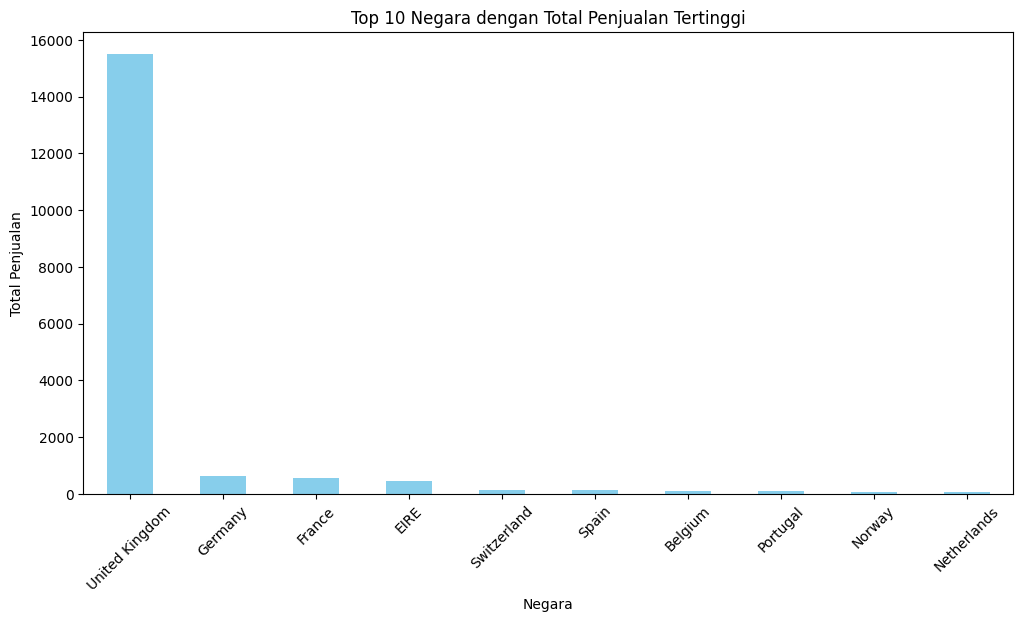

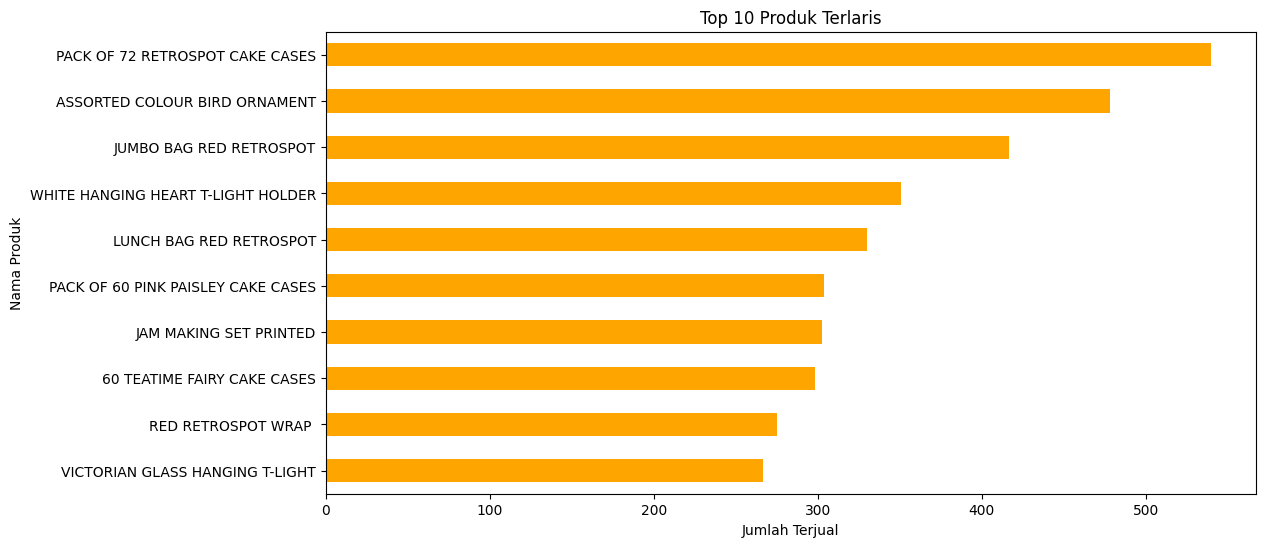

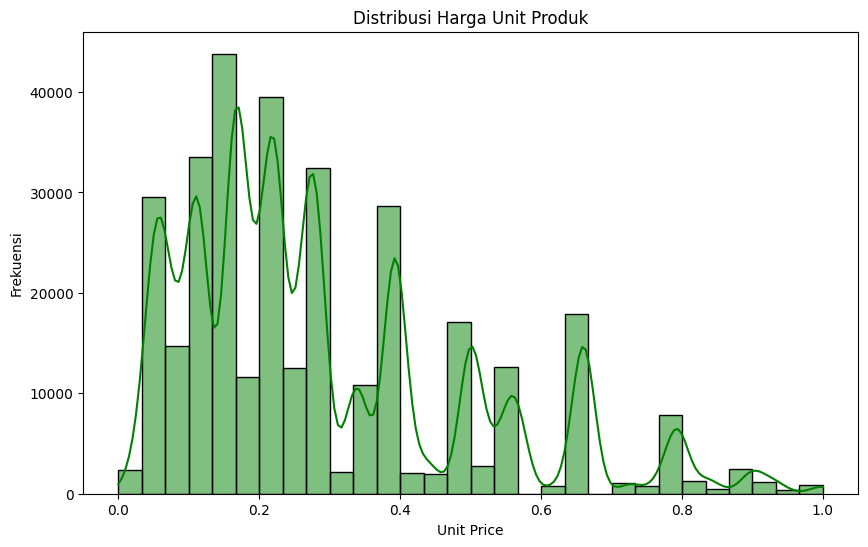

<ipython-input-14-1d7b0fd4ee92>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['InvoiceMonth'] = df_no_outliers['InvoiceDate'].dt.to_period('M')


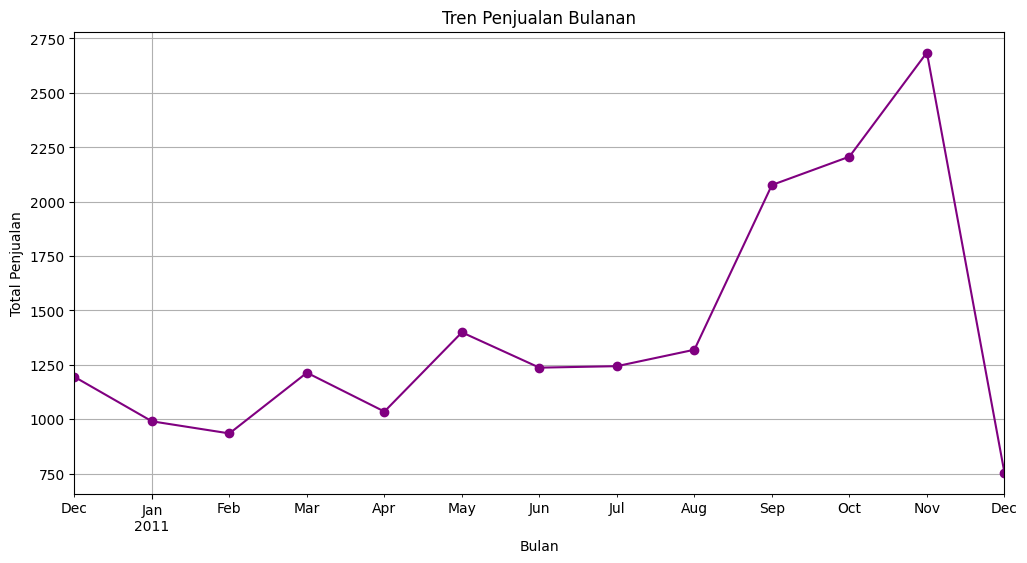

In [14]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualisasi Total Penjualan per Negara
df_no_outliers['TotalSales'] = df_no_outliers['Quantity'] * df_no_outliers['UnitPrice']

sales_by_country = df_no_outliers.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sales_by_country.plot(kind='bar', color='skyblue')
plt.title('Top 10 Negara dengan Total Penjualan Tertinggi')
plt.ylabel('Total Penjualan')
plt.xlabel('Negara')
plt.xticks(rotation=45)
plt.show()

# 2. Visualisasi Produk Terlaris
top_products = df_no_outliers.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='barh', color='orange')
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Nama Produk')
plt.gca().invert_yaxis()  # Invert sumbu Y untuk tampilan lebih baik
plt.show()

# 3. Distribusi Harga Unit Produk
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['UnitPrice'], bins=30, kde=True, color='green')
plt.title('Distribusi Harga Unit Produk')
plt.xlabel('Unit Price')
plt.ylabel('Frekuensi')
plt.show()

# 4. Tren Penjualan dari Waktu ke Waktu
df_no_outliers['InvoiceMonth'] = df_no_outliers['InvoiceDate'].dt.to_period('M')

monthly_sales = df_no_outliers.groupby('InvoiceMonth')['TotalSales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', color='purple')
plt.title('Tren Penjualan Bulanan')
plt.ylabel('Total Penjualan')
plt.xlabel('Bulan')
plt.grid()
plt.show()
